In [2]:
# import tensorflow as tf
# from keras.models import Model, load_model, Sequential
# from keras.layers import Input, Dense, Flatten, Reshape, Dropout, Lambda, Embedding, InputLayer, Concatenate, Reshape, LeakyReLU
# from keras.regularizers import L1L2
# from keras.optimizers import Adam
# from keras.utils import to_categorical
# from keras.utils.vis_utils import plot_model
# import keras.backend as K
# from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from packaging import version
# import tensorboard
# tensorboard.__version__
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats

from EM import network as net
from EM import data_prep
import json
from pathlib import Path
import os

Using TensorFlow backend.


In [24]:
exp_path = 'EM/EM_Exp5/'
best_score = 1
best_id = -999
for i in range(10):
    if i > 9:
        f = open(exp_path+'tmp/'+exp_path[3:]+'trial_{}/trial.json'.format(str(i)))
        curr_iter = json.load(f)
        curr_score = curr_iter['score']
        if curr_score == None:
            continue
        print('The best score is',best_score,'and the current score is',curr_score,'and the current ID','trial_{}'.format(str(i)))
        if best_score>curr_score:
            best_score=curr_score
            best_id='trial_{}'.format(str(i))
    else:
        f = open(exp_path+'tmp/'+exp_path[3:]+'trial_0{}/trial.json'.format(str(i)))
        curr_iter = json.load(f)
        curr_score = curr_iter['score']
        print('The best score is',best_score,'and the current score is',curr_score,'and the current ID','trial_0{}'.format(str(i)))
        if best_score>curr_score:
            best_score=curr_score
            best_id='trial_0{}'.format(str(i))
print('The best trial is',best_id,'with a loss of',best_score)

The best score is 1 and the current score is 0.0034262369634282374 and the current ID trial_00
The best score is 0.0034262369634282374 and the current score is 0.0042007395639560696 and the current ID trial_01
The best score is 0.0034262369634282374 and the current score is 0.003917325376425394 and the current ID trial_02
The best score is 0.0034262369634282374 and the current score is 0.004187268973405015 and the current ID trial_03
The best score is 0.0034262369634282374 and the current score is 0.003569802977820926 and the current ID trial_04
The best score is 0.0034262369634282374 and the current score is 0.004222874741743107 and the current ID trial_05
The best score is 0.0034262369634282374 and the current score is 0.003637955766847425 and the current ID trial_06
The best score is 0.0034262369634282374 and the current score is 0.0038885878262236075 and the current ID trial_07
The best score is 0.0034262369634282374 and the current score is 0.004053408255425617 and the current ID 

In [36]:
best_id='trial_04'
f = open(exp_path+'tmp/'+exp_path[3:]+best_id+'/trial.json')
best_iter = json.load(f)
best_parameters = pd.DataFrame(best_iter['hyperparameters']['values'], index=[0])
best_parameters


,hp_neigh_envelope,hp_num_complex_pairs,hp_num_real,hp_beta_units,hp_enc_dec_size,hp_delta_units,hp_l1_reg
0,3,1,3,8,16,16,6.701648e-11


In [31]:
param_list = []
score_list = []

for i in range(10):
    if i > 9:
        best_id='trial_{}'.format(str(i))
        f = open(exp_path+'tmp/'+exp_path[3:]+best_id+'/trial.json')
    else:
        best_id='trial_0{}'.format(str(i))
        f = open(exp_path+'tmp/'+exp_path[3:]+best_id+'/trial.json')
    best_iter = json.load(f)
    best_parameters = pd.DataFrame(best_iter['hyperparameters']['values'], index=[0])

    param_list.append(best_parameters)
    score_list.append(best_iter['score'])

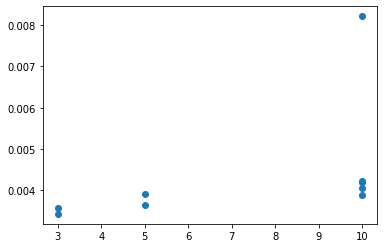

In [27]:
param_for_display = 'hp_neigh_envelope'

x=[]
y=[]

for i in range(len(param_list)):
    x.append(param_list[i][param_for_display].values[0])
    y.append(score_list[i])
    
    
plt.scatter(x,y)

In [37]:
exp_data_path = exp_path+'sim_data/training/nb_neigh_{}/'.format(5)
params={}

### Experiment Parameters ###

params['state_features'] = 1
params['group_features'] = 3


### Hyper Parameters ###
params['hp_neigh_envelope'] = best_parameters['hp_neigh_envelope'].values[0]

params['hp_num_neighbors'] = 50

params['hp_num_complex_pairs'] = best_parameters['hp_num_complex_pairs'].values[0]
params['hp_num_real'] = best_parameters['hp_num_real'].values[0]

params['hp_beta_units'] = best_parameters['hp_beta_units'].values[0]

enc_dec_size = best_parameters['hp_enc_dec_size'].values[0]
params['hp_phi_enc_units'] = enc_dec_size
params['hp_psi_enc_units'] = enc_dec_size
params['hp_psi_dec_units'] = enc_dec_size

params['hp_delta_units'] = best_parameters['hp_delta_units'].values[0]

l1_reg = best_parameters['hp_l1_reg'].values[0]
params['hp_l1_reg'] = l1_reg
params['hp_l2_reg'] = l1_reg*1e-2

In [38]:
ae, pipeline = net.pipeline(params)

In [ ]:
x = np.load(exp_data_path+'x_head.npy')
x_neigh = np.load(exp_data_path+'x_neigh_head.npy')
x_plus = np.load(exp_data_path+'x_plus_head.npy')
x_dot = np.load(exp_data_path+'x_dot_head.npy')
x_dot_max = np.load(exp_data_path+'x_dot_head_max.npy')
# x_dot = x_dot/x_dot.max()

In [ ]:
x.shape,x_neigh.shape,x_plus.shape,x_dot.shape

In [ ]:
x_dot_max

In [40]:
# pipeline.load_weights(exp_path+'Realizations/20230621-124537_pipeline.h5') #EM_Exp_1
pipeline.load_weights(exp_path+'Realizations/20240228-141540_pipeline.h5') #EM_Exp_4

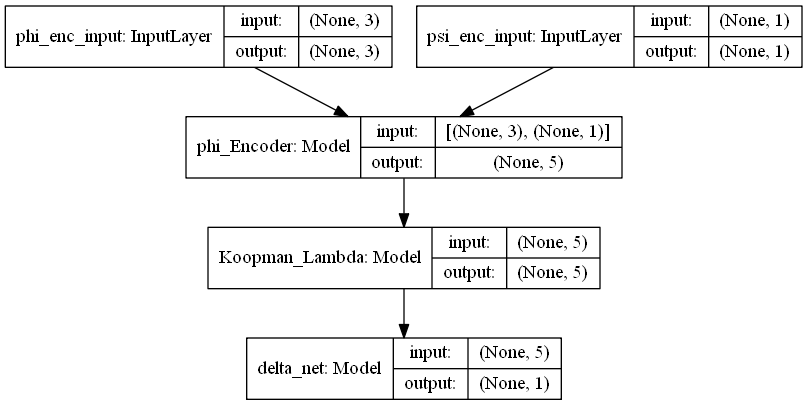

In [39]:
from keras.utils.vis_utils import plot_model
plot_model(pipeline, 'Result_Analysis/'+exp_path+"Pipeline.png", True, True)

In [41]:
####################
### Test Dataset ###
####################

### Import Test Dataset ###

df_master = pd.read_csv(exp_path+'sim_data/test/test2.csv', sep=' ',names=['Time', 'Agent', 'X', 'Y', 'Heading'])
df_master.describe()

,Time,Agent,X,Y,Heading
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,162.000000,99.500000,6.474879,-4.005526,201.564254
std,93.819696,57.734749,23.219824,21.579944,51.954325
min,0.000000,0.000000,-35.499657,-35.499980,0.000000
25%,81.000000,49.750000,-15.874242,-23.375986,169.237970
50%,162.000000,99.500000,15.825538,-8.351022,201.356287
75%,243.000000,149.250000,26.094102,16.102823,232.110637
max,324.000000,199.000000,35.499814,35.499134,359.840078


In [42]:
### Scale Test Dataset ###
X_min = -35.5
X_max = 35.5
Y_min = -35.5
Y_max = 35.5
Heading_min = 0
Heading_max = 360

df_scaled = df_master.copy()
df_scaled['X'] = ((df_master['X'] - X_min)/(X_max - X_min)).values
df_scaled['Y'] = ((df_master['Y'] - Y_min)/(Y_max - Y_min)).values
heads = []
for i in df_master['Heading'].values:
    if 90 - i != abs(90 - i):
        heads.append(450 - i)
    else:
        heads.append(90 - i)

df_scaled['Heading'] = heads
df_scaled['Heading'] = ((df_scaled['Heading'] - Heading_min)/(Heading_max - Heading_min)).values

nb_agents = df_scaled.Agent.max() + 1
nb_timesteps = df_scaled.Time.max() + 1

# for i in range(nb_agents):
#     counter = 0
#     diff_array = np.diff(df_scaled.loc[(df_scaled.Agent == i)].Heading)
#     for j in range(1,nb_timesteps):
#         if abs(diff_array[j-1]) > 0.5:
#             if diff_array[j-1]*-1 > 0:
#                 counter += 1
#             else:
#                 counter -= 1
#         df_scaled.loc[(df_scaled.Agent == i) & (df_scaled.Time == j),'Heading'] += counter 

df_scaled.describe()

,Time,Agent,X,Y,Heading
count,65000.000000,65000.000000,65000.000000,6.500000e+04,65000.000000
mean,162.000000,99.500000,0.591195,4.435841e-01,0.656345
std,93.819696,57.734749,0.327040,3.039429e-01,0.163327
min,0.000000,0.000000,0.000005,2.783245e-07,0.000000
25%,81.000000,49.750000,0.276419,1.707608e-01,0.594672
50%,162.000000,99.500000,0.722895,3.823800e-01,0.683300
75%,243.000000,149.250000,0.867523,7.268003e-01,0.765065
max,324.000000,199.000000,0.999997,9.999878e-01,0.999959


In [43]:
# x = np.load(exp_data_path+'x_head.npy')
# x_neigh = np.load(exp_data_path+'x_neigh_head.npy')
# x_plus = np.load(exp_data_path+'x_plus_head.npy')
# x_dot = np.load(exp_data_path+'x_dot_head.npy')
x_dot_max = np.load(exp_data_path+'x_dot_head_max.npy')

In [44]:
x_dot_max*360

18.000000000000057

In [ ]:
tsteps = df_scaled['Time'].unique().shape[0]-1
ag_nb = 100
np.sqrt(np.square(df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < tsteps)]['X'].values - df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < (tsteps+1)) & (df_scaled.Time > 0)]['X'].values) + np.square(df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < tsteps)]['Y'].values - df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < (tsteps+1)) & (df_scaled.Time > 0)]['Y'].values))

In [ ]:
df_scaled.loc[df_scaled['Time'] == 0,'X']= np.random.random(df_scaled.loc[df_scaled['Time'] == 0,'X'].size)
df_scaled.loc[df_scaled['Time'] == 0,'Y']= np.random.random(df_scaled.loc[df_scaled['Time'] == 0,'Y'].size)
df_scaled.loc[df_scaled['Time'] == 0,'Heading']= np.random.random(df_scaled.loc[df_scaled['Time'] == 0,'Heading'].size)

In [ ]:
df_scaled.loc[df_scaled['Time'] == 0]

In [48]:
### Simulate Test Case ###
# df_scaled = df_scaled.loc[df_scaled['Case'] == 1].drop(['Case'],axis=1)
x_dot_max = 18.0/360
df_initial_state = df_scaled.loc[df_scaled['Time'] == 0].copy()
nb_timesteps = 501#df_scaled['Time'].unique().shape[0]
nb_agents = df_scaled['Agent'].unique().shape[0]
agent_velocity = 0.0028169
for ts in range(1,nb_timesteps):
    print('Simulating Time Step',ts,'out of',nb_timesteps-1)
    flock = df_initial_state.loc[df_initial_state['Time']==ts-1][['X','Y']]
    nbrs = NearestNeighbors(n_neighbors=params['hp_num_neighbors']+1, algorithm='ball_tree').fit(flock.values)
    distances, indices = nbrs.kneighbors(flock.values)
    for agent in range(nb_agents):
        # Prepare sim inputs for current timestep using previous timestep

        # neigbours = identify_neighbours(agent,df_initial_state,ts-1)
        neigbours = indices[agent][1:]
        nb_dist = distances[agent][1:]
        # if agent == 0:
        #     print(neigbours)
        test_sim_x = data_prep.data_prep_x_group(agent,neigbours,nb_dist,df_initial_state,ts-1,k=params['hp_num_neighbors'],p=10)
        test_sim_x = test_sim_x[np.newaxis,:]

        test_x_head = np.reshape(np.asarray(test_sim_x)[:,0],(np.asarray(test_sim_x)[:,0].shape[0],-1))
        test_x_neigh_head = np.asarray(test_sim_x)[:,1:]

        old_x = df_initial_state.loc[(df_initial_state['Agent'] == agent) & (df_initial_state['Time'] == ts-1)]['X'].values[0]
        old_y = df_initial_state.loc[(df_initial_state['Agent'] == agent) & (df_initial_state['Time'] == ts-1)]['Y'].values[0]
        old_head = df_initial_state.loc[(df_initial_state['Agent'] == agent) & (df_initial_state['Time'] == ts-1)]['Heading'].values[0]

        # Predict outputs for current timestep
        y_pred = pipeline.predict([test_x_neigh_head,test_x_head])
        new_head = y_pred[0][0]*x_dot_max + old_head
        # if agent == 0:
        #     print(new_head)

        if(new_head>1):
            new_head -= 1
        elif(new_head<0):
            new_head += 1

        new_x = old_x + np.cos(2*np.pi*new_head)*agent_velocity

        if(new_x>1):
            new_x -= 1
        elif(new_x<0):
            new_x += 1

        new_y = old_y + np.sin(2*np.pi*new_head)*agent_velocity
        
        if(new_y>1):
            new_y -= 1
        elif(new_y<0):
            new_y += 1

        df_initial_state = df_initial_state.append(pd.DataFrame(np.concatenate([np.asarray([ts,agent]), np.asarray([new_x,new_y,new_head])]).reshape(1,-1),columns=list(df_initial_state)),ignore_index=True)

Simulating Time Step 1 out of 500
Simulating Time Step 2 out of 500
Simulating Time Step 3 out of 500
Simulating Time Step 4 out of 500
Simulating Time Step 5 out of 500
Simulating Time Step 6 out of 500
Simulating Time Step 7 out of 500
Simulating Time Step 8 out of 500
Simulating Time Step 9 out of 500
Simulating Time Step 10 out of 500
Simulating Time Step 11 out of 500
Simulating Time Step 12 out of 500
Simulating Time Step 13 out of 500
Simulating Time Step 14 out of 500
Simulating Time Step 15 out of 500
Simulating Time Step 16 out of 500
Simulating Time Step 17 out of 500
Simulating Time Step 18 out of 500
Simulating Time Step 19 out of 500
Simulating Time Step 20 out of 500
Simulating Time Step 21 out of 500
Simulating Time Step 22 out of 500
Simulating Time Step 23 out of 500
Simulating Time Step 24 out of 500
Simulating Time Step 25 out of 500
Simulating Time Step 26 out of 500
Simulating Time Step 27 out of 500
Simulating Time Step 28 out of 500
Simulating Time Step 29 out o

In [ ]:
df_initial_state.to_pickle('Result_Analysis/'+exp_path+'20240305_Simulated_results_500ts_test1_10p18d')
# df_initial_state = pd.read_pickle('Result_Analysis/'+exp_path+'20240305_Simulated_results_500ts_test1_3p18d')

In [ ]:
ag = 13
err_thresh = 0.05
plt.errorbar(range(nb_timesteps),df_scaled.loc[(df_scaled.Agent == ag) & (df_scaled.Time < nb_timesteps)].Heading,yerr=err_thresh,label='Observed')
plt.plot(range(nb_timesteps), df_initial_state.loc[(df_initial_state.Agent == ag) & (df_initial_state.Time < nb_timesteps)].Heading,label='Simulated')
plt.legend()

In [ ]:
nb_timesteps = 100

In [ ]:
for ag in range(200):
    plt.plot(range(nb_timesteps), df_initial_state.loc[(df_initial_state.Agent == ag) & (df_initial_state.Time < nb_timesteps)].Heading,label='Simulated')

In [ ]:
for ag in range(200):
    plt.plot(range(301), df_scaled.loc[(df_scaled.Agent == ag) & (df_scaled.Time < 301)].Heading,label='Observed')

In [ ]:
error_list = []
for i in range(nb_timesteps):#df_scaled['Time'].unique().shape[0]):
    pred = df_initial_state[df_initial_state.Time==i][['Heading']].values
    true = df_scaled.loc[df_scaled.Time==i][['Heading']].values
    error = np.mean(np.abs(pred-true))
    error_list.append(error)

plt.plot(error_list)
plt.xscale('log')

In [ ]:
error_list = []
for i in range(nb_timesteps):
    pred_X = df_initial_state[df_initial_state.Time==i][['X']].values
    true_X = df_scaled.loc[df_scaled.Time==i][['X']].values
    pred_Y = df_initial_state[df_initial_state.Time==i][['Y']].values
    true_Y = df_scaled.loc[df_scaled.Time==i][['Y']].values
    error = 0.5*(np.mean(np.abs(pred_X-true_X)) + np.mean(np.abs(pred_Y-true_Y)))
    error_list.append(error)

plt.plot(error_list)
plt.xscale('log')

In [ ]:
(np.array(error_list)<=0.05).sum()

In [ ]:
t_step = 10
bins = 8
df_prediction = df_initial_state.loc[(df_initial_state.Time == t_step)]
df_ground_truth = df_scaled.loc[(df_scaled.Time == t_step)]
plt.imshow(stats.binned_statistic_2d(df_ground_truth.X, df_ground_truth.Y, None, 'count', bins=bins).statistic, interpolation='quadric', vmin=0,vmax=7)
plt.colorbar()



In [ ]:
plt.imshow(stats.binned_statistic_2d(df_prediction.X, df_prediction.Y, None, 'count', bins=bins).statistic, interpolation='quadric', vmin=0,vmax=7)
plt.colorbar()

In [49]:
pred_pol_l = []
obs_pol_l = []
for ts in range(nb_timesteps):
    pred_head = df_initial_state.loc[df_initial_state.Time == ts].Heading
    obs_head = df_scaled.loc[df_scaled.Time == ts].Heading

    pred_pol = np.sqrt((np.sum(np.sin(2*np.pi*pred_head)))**2 + (np.sum(np.cos(2*np.pi*pred_head)))**2)/(df_initial_state.Agent.max()+1)
    obs_pol = np.sqrt((np.sum(np.sin(2*np.pi*obs_head)))**2 + (np.sum(np.cos(2*np.pi*obs_head)))**2)/(df_scaled.Agent.max()+1)

    pred_pol_l.append(pred_pol)
    obs_pol_l.append(obs_pol)

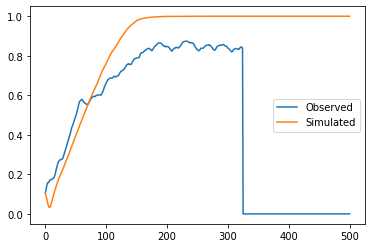

In [50]:
plt.plot(obs_pol_l,label='Observed')
plt.plot(pred_pol_l,label='Simulated')
plt.legend()

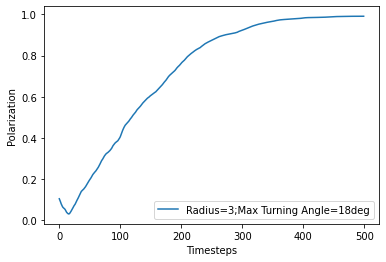

In [21]:
# neigh_env_list = [3,10]
# max_turn_list = [9,18]
neigh_env_list = [3]
max_turn_list = [18]
nb_timesteps = 500
exp_path = 'EM/EM_Exp5/'

for neigh_env in neigh_env_list:
    for max_turn in max_turn_list:
        df_initial_state = pd.read_pickle('Result_Analysis/'+exp_path+'Simulated_results_500ts_test1_{}p{}d/'.format(neigh_env,max_turn)+'20240305_Simulated_results_500ts_test1_{}p{}d'.format(neigh_env,max_turn))
        pred_pol_l = []
        for ts in range(nb_timesteps):
            pred_head = df_initial_state.loc[df_initial_state.Time == ts].Heading
            pred_pol = np.sqrt((np.sum(np.sin(2*np.pi*pred_head)))**2 + (np.sum(np.cos(2*np.pi*pred_head)))**2)/(df_initial_state.Agent.max()+1)
            pred_pol_l.append(pred_pol)
        plt.plot(pred_pol_l,label='Radius={};Max Turning Angle={}deg'.format(neigh_env,max_turn))
        plt.xlabel('Timesteps')
        plt.ylabel('Polarization')
        plt.legend()
plt.savefig('Result_Analysis/'+exp_path+'varying_emergence.png')

In [23]:
np.mean(np.diff(pred_pol_l)[25:50])*100

0.4918879083693252

In [22]:
np.diff(pred_pol_l)[0:100]

array([-0.00716915, -0.0079093 , -0.00883722, -0.00676299, -0.00617417,
       -0.00491412, -0.0029744 , -0.00252686, -0.00262995, -0.00448992,
       -0.00581067, -0.00547028, -0.00295044, -0.00303964, -0.00178169,
       -0.00010836,  0.00257401,  0.00432338,  0.00466684,  0.00513288,
        0.00530416,  0.00517754,  0.00581729,  0.00581761,  0.00453967,
        0.00403079,  0.00664899,  0.00752351,  0.00452985,  0.00536434,
        0.00601244,  0.00632092,  0.0055505 ,  0.00694293,  0.00689625,
        0.0055746 ,  0.00340644,  0.00281024,  0.00258342,  0.00299617,
        0.00374394,  0.00388129,  0.00389623,  0.00514776,  0.00540611,
        0.00504338,  0.00494166,  0.00447133,  0.00498104,  0.00426787,
        0.00443044,  0.00450076,  0.00545047,  0.00558739,  0.00484998,
        0.00387987,  0.00370449,  0.00350989,  0.00316533,  0.00351165,
        0.00428466,  0.00426386,  0.00428941,  0.00500943,  0.00556959,
        0.00581093,  0.00573797,  0.00659185,  0.00589568,  0.00

In [51]:
############################# Sim Visualization #################################
import tkinter
import math
from PIL import Image, ImageTk

In [55]:
class Boid:
    def __init__(self, agent, screen_size, db):
        self.ts = 0
        self.agent = agent
        self.x = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].X.values[0]*screen_size
        self.y = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Y.values[0]*screen_size
        self.heading1 = np.arcsin(np.sin(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        self.heading2 = np.arccos(np.cos(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        self.color = "black"

    def draw_boid(self, canvas):
        size = 5
        x1 = self.x + size * math.cos(self.heading2)
        x2 = self.y + size * math.sin(self.heading1)
        canvas.create_line(self.x, self.y, x1, x2, fill='black', arrow='last', arrowshape=(12.8,16,4.8), width=2, tags=self.agent)

    def flock(self, canvas, db, screen_size, window):
        if (self.ts + 5) <= db.Time.max():
            self.ts += 5
            self.x = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].X.values[0]*screen_size
            self.y = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Y.values[0]*screen_size
            self.heading1 = np.arcsin(np.sin(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
            self.heading2 = np.arccos(np.cos(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        else:
            window.destroy()
        
        self.draw_boid(canvas)

In [56]:
def initialise_canvas(window, screen_size):
    canvas = tkinter.Canvas(window, width=screen_size, height=screen_size)
    canvas.pack()
    window.resizable(False, False)
    return canvas

def create_boids(canvas, no_of_boids, screen_size, db):
    list_of_boids = []
    for n in range(no_of_boids):
        boid = Boid(n,screen_size,db)
        list_of_boids.append(boid)
        boid.draw_boid(canvas)
    return list_of_boids

def boid_behaviours(canvas, list_of_boids,db,screen_size,window):
    canvas.delete('all')
    for boid in list_of_boids:
        boid.flock(canvas,db,screen_size,window)
        
    # canvas.postscript(file='Result_Analysis/'+exp_path+"my_sim_ts_{}.ps".format(list_of_boids[0].ts), colormode='color')
    canvas.after(1, boid_behaviours, canvas, list_of_boids,db,screen_size,window)

def vizualize(db):
    screen_size = 300
    no_of_boids = int(db.Agent.max() + 1)
    window = tkinter.Tk()
    canvas = initialise_canvas(window, screen_size)
    list_of_boids = create_boids(canvas, no_of_boids, screen_size, db)
    boid_behaviours(canvas, list_of_boids,db,screen_size,window)
    window.mainloop()

In [57]:
vizualize(df_initial_state)
# vizualize(df_scaled)

In [ ]:
from PIL import Image

for i in range(100):
    psimage=Image.open('Result_Analysis/'+exp_path+'my_sim_ts_{}.ps'.format(1*(i+1)))
    psimage.save('Result_Analysis/'+exp_path+'my_sim_ts_{}.png'.format(1*(i+1)))

In [ ]:
# import imageio
# images = []
# for i in range(3,100):
#     images.append(imageio.imread('Result_Analysis/'+exp_path+'my_sim_ts_{}.png'.format(5*(i+1))))
# imageio.mimsave('Result_Analysis/'+exp_path+'movie.gif', images)

In [ ]:
import cv2
import os

image_folder = 'Result_Analysis/'+exp_path
video_name = 'video.avi'

# images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images = []
for i in range(3,100):
    images.append('Result_Analysis/'+exp_path+'my_sim_ts_{}.png'.format(1*(i+1)))
frame = cv2.imread(images[0])
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 3, (width,height))

for image in images:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()